# Lab 4 - wykrywanie anomalii i nowości

Odkrywanie anomalii i nowości w zbiorach danych jest istotnym etapem w analizie danych, który ma na celu identyfikację nietypowych i nieoczekiwanych wzorców.
Jedną z popularnych metod jest wykorzystanie miękkiej analizy skupień, które wskazują obszary o niskim zagęszczeniu. Zastosowanie tego rodzaju metod umożliwia identyfikację obiektów, które znacznie odbiegają od normy są "rzadkie" w kontekście ułożenia obiektów w $N$-wymiarowej przestrzeni metrycznej. Dzięki takim zabiegom można wykryć nietypowe zachowania, potencjalne oszustwa lub błędnie odczytane wartości wpływające negatywnie na jakość późniejszego procesu uczenia modeli matematycznych.

## Wykrywanie anomalii

Do określenia gęstości obszarów można z powodzeniem wykorzystać poznany wcześniej **Gaussowski Model Mieszany**.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, _ = make_blobs(n_samples=10000, n_features=2, centers=5, random_state=10001)

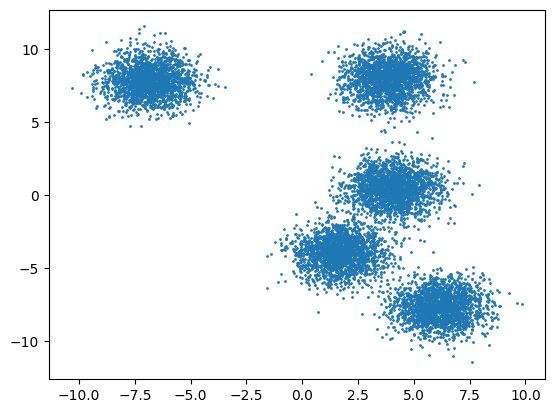

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=1)

Jednym z najitotniejszych etapów detekcji anomalii jest wyznaczenie odsetka anomalii ($v$), który posłuży do określenia wartości progowej gęstości. Na tej podstawie ($v%$) obiektów znajdujących się w obszarach poniżej gęstości progowej zostanie uznanych za anomalię.

In [4]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [5]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

GaussianMixture(n_components=5)

In [6]:
densities = gmm.score_samples(X)
density_threshold = np.percentile(densities, 5)
anomalies = X[densities < density_threshold]

In [7]:
anomalies

array([[ 4.52091452e+00, -1.99661041e+00],
       [ 6.63155283e+00, -1.54740761e+00],
       [ 4.64130951e+00,  5.38959159e+00],
       [ 6.45620566e+00,  6.52193502e+00],
       [ 1.14283796e+00, -1.46957702e+00],
       [ 6.15054587e+00, -4.95546932e+00],
       [ 5.79844410e-01, -6.16987632e+00],
       [-1.03408387e+01,  7.39064408e+00],
       [ 6.48428298e+00,  6.90892619e+00],
       [ 2.89468660e+00,  5.60023098e+00],
       [-4.12921368e+00,  8.83003223e+00],
       [-1.00993985e-01, -5.62112750e+00],
       [ 6.21003096e+00,  7.58695999e+00],
       [ 1.62830705e+00,  8.84488277e+00],
       [-5.46840720e+00,  5.72445316e+00],
       [ 7.45973928e+00, -9.69724343e+00],
       [-4.39448804e+00,  7.91022415e+00],
       [ 6.74564582e+00, -1.10254607e+01],
       [ 2.24593229e+00, -6.61156307e+00],
       [ 5.46994087e+00, -3.11637322e+00],
       [-7.12811053e-01, -2.91424477e+00],
       [ 5.15642874e+00, -5.40142725e+00],
       [ 4.13232529e+00,  4.70532845e+00],
       [ 2.

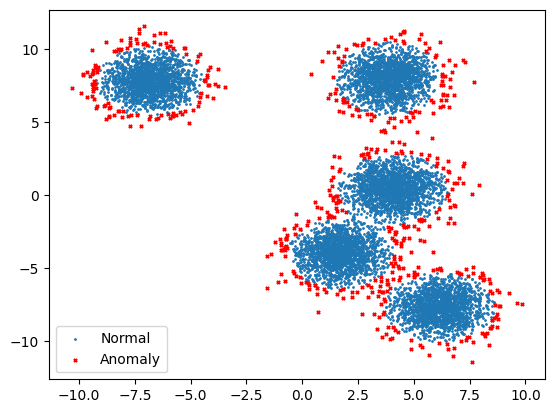

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=1, label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], s=5, marker='x', c='red', label='Anomaly')

plt.legend()

plt.show()

Obiekty odstające można usunąć za pomocą funkcjonalności biblioteki *numpy*.

In [9]:
X_clear = X[~np.isin(X, anomalies).all(axis=1)]

In [10]:
assert X_clear.shape[0] == X.shape[0] - anomalies.shape[0]

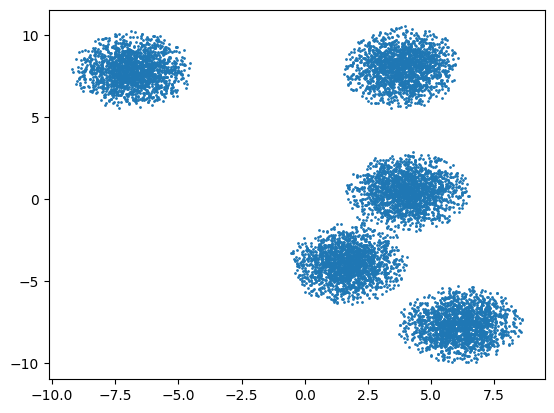

In [11]:
plt.scatter(X_clear[:, 0], X_clear[:, 1], s=1)

## Wykrywanie nowości

Proces wykrywania nowości jest podobny do procesu detekcji anomalii. Jedyna różnica polega na założeniu dopasowywania modelu do danych nieposiadających anomalii. Wyznaczanie gęstości obszarów wraz z obiektami odstającymi (stanowiącymi *nowości*) odbywać się będzie na zbiorze danych wykorzystanym w treningu zaktualizowanym o nowe obiekty.

In [12]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X_clear)

GaussianMixture(n_components=5)

In [15]:
densities = gmm.score_samples(X)
density_threshold = np.percentile(densities, 5)
anomalies = X[densities < density_threshold]

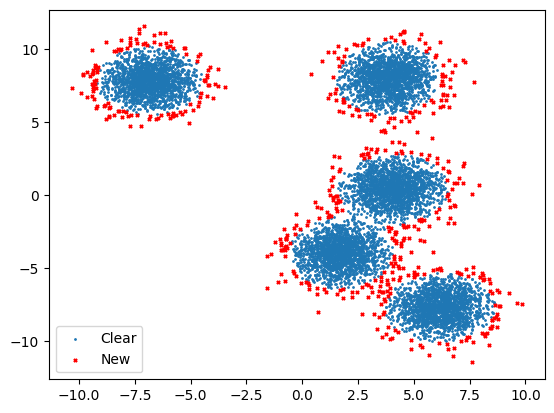

In [17]:
plt.scatter(X_clear[:, 0], X_clear[:, 1], s=1, label='Clear')
plt.scatter(anomalies[:, 0], anomalies[:, 1], s=5, marker='x', c='red', label='New')

plt.legend()

plt.show()

## Zadania
1. Usunąć anomalie (od 5 do 10%) ze zbioru `california housing` korzystając z *Gaussowskiego Modelu Mieszanego*.
2. Porównać jak usunięcie anomalii wpływa na wartości wskaźników *Kryterium Informacyjnego Akaiego* oraz *Bayesowskiego Kryterium Informacyjnego* dla wskazanych odsetków w zadaniu 1.
3. (\*) Przygotować wizualizacje dwuwymiarowe obrazujące obiekty, które stanowią anomalie. Czy wskazane obiekty przedstawione na płaszczyźnie rówież odstają od pozostałych? Dla chętnych: do rzutowania na płaszczyznę w celach wizualizacji można wykorzystać dedykowane podejście (*metodę [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)*) zamiast generycznego algorytmu *Analizy głównych składowych*.